<a href="https://colab.research.google.com/github/ganeshutah/Jove/blob/master/For_CS3100_Fall2024/03_Advanced_DFA/Lec5_Live_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFA design exercise

DFA that accepts (Odd 0's or Even 1's) AND the number MSB-first isn't divisible by 3

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA import *
from jove.LangDef    import *  # for testing DFA actions
from jove.Def_RE2NFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

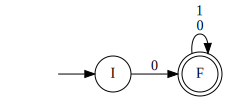

In [13]:
b0 = md2mc('''DFA

I : 0 -> F
F : 0|1 -> F
I : 1 -> BH
BH : 0|1 -> BH
''')

dotObj_dfa(b0, FuseEdges=True)

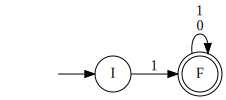

In [14]:
b1 = md2mc('''DFA

I : 1 -> F
F : 0|1 -> F
I : 0 -> BH
BH : 0|1 -> BH
''')

dotObj_dfa(b1, FuseEdges=True)

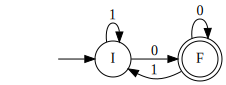

In [15]:
e0 = md2mc('''DFA
I : 0 -> F
F : 0 -> F
F : 1 -> I
I : 1 -> I
''')

dotObj_dfa(e0, FuseEdges=True)

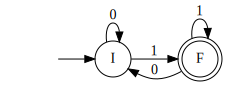

In [16]:
e1 = md2mc('''DFA
I : 1 -> F
F : 1 -> F
F : 0 -> I
I : 0 -> I
''')

dotObj_dfa(e1, FuseEdges=True)

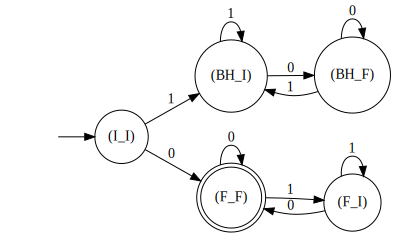

In [17]:
b0e0 =  intersect_dfa(b0,e0)
dotObj_dfa(b0e0, FuseEdges=True)

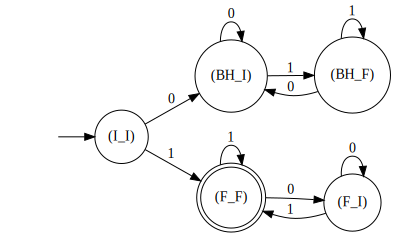

In [18]:
b1e1 =  intersect_dfa(b1,e1)
dotObj_dfa(b1e1, FuseEdges=True)

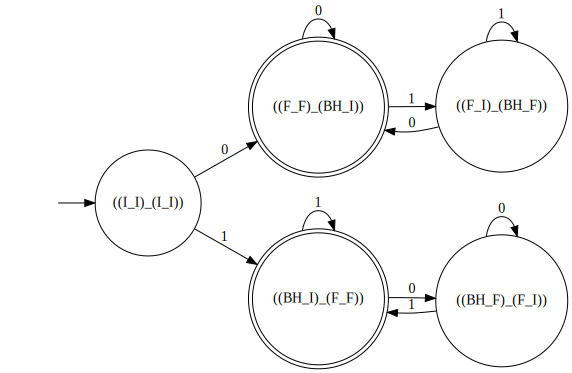

In [19]:
b0e0ORb1e1 = union_dfa(b0e0, b1e1)
dotObj_dfa(b0e0ORb1e1, FuseEdges=True)

Odd 0's

In [ ]:
# DFA over {0,1} that accepts all strings that contain odd # of 0's

Odd_zeros = md2mc('''
DFA

Ieven0 : 0 -> FOdd0
Ieven0 : 1 -> Ieven0

FOdd0 : 0 -> Ieven0
FOdd0 : 1 -> FOdd0
''')

dotObj_dfa(Odd_zeros, FuseEdges=True)

Even 1's

In [ ]:
# DFA over {0,1} that accepts all strings that contain an even number of 1's

Even_ones = md2mc('''
DFA

IFEven1 : 0 -> IFEven1
IFEven1 : 1 -> Odd1

Odd1 : 0 -> Odd1
Odd1 : 1 -> IFEven1
''')

dotObj_dfa(Even_ones, FuseEdges=True)

Odd 0's OR even 1's

In [ ]:
help(union_dfa)

In [ ]:
help(dotObj_dfa)

In [ ]:
Odd0s_Even1s = union_dfa(Odd_zeros, Even_ones)

In [ ]:
dotObj_dfa(Odd0s_Even1s)

In [ ]:
dotObj_dfa(Odd0s_Even1s, STATENAME_MAXSIZE=1)

# Mod-3 DFA, MSB-first

(But, does it matter whether MSB-first or LSB-first?)



In [ ]:
## KEEP DRAWING WHILE YOU FILL !!

DFA3 = md2mc('''DFA

IF : 0 -> IF
IF : 1 -> S1

S1 : 0 -> S2
S1 : 1 -> IF

S2 : 0 -> S1
S2 : 1 -> S2


''')

dotObj_dfa(DFA3)

In [ ]:
# MSB-first isn't divisible by 3

not_DFA3 = comp_dfa(DFA3)
dotObj_dfa(not_DFA3)

In [ ]:
Finally, (Odd0 or Even1) AND (not mod div by 3)

In [ ]:
O0_or_E1_and_nm3 = intersect_dfa(Odd0s_Even1s, not_DFA3)
dotObj_dfa(O0_or_E1_and_nm3, STATENAME_MAXSIZE=1)

In [ ]:
min_answer = min_dfa(O0_or_E1_and_nm3)

In [ ]:
len(min_answer["Q"])

In [ ]:
len(O0_or_E1_and_nm3["Q"])

In [ ]:
dotObj_dfa(min_answer, STATENAME_MAXSIZE=1)

# Even the min DFA can be large!

# Illustrate REs to generate test DFA

In [ ]:
re2nfa('00*(0+1*)')

In [ ]:
nd = nfa2dfa(re2nfa('00*(0+1*)'))

In [ ]:
mnd = min_dfa(nd, state_name_mode='verbose')

In [ ]:
help(min_dfa)

In [ ]:
len(nd["Q"])

In [ ]:
len(mnd["Q"])

In [ ]:
dotObj_dfa(nd, STATENAME_MAXSIZE=40)

In [ ]:
dotObj_dfa(mnd)